# Econometría Bayesiana: Modelos lineales

Una regresión lineal simple (enfoque frecuentista) puede ser vista como

$$Y = X \beta + \epsilon$$

donde $Y$ es la variable dependiente (variable que queremos predecir), $X$ las variables independientes (variables predictoras), y $\beta$ los coeficientes (parámetros) del modelo a estimar. $\epsilon$ es el término del error que asumimos sigue una distribución normal.

Se puede usar MCO o ML para estimar $\beta$.

## Reformulación probabilística

La econometría bayesiana adopta un enfoque probabilístico, y expresa el modelo en términos de distribuciones de probabilidad.

Nuestro modelo lineal puede ser representado como:

$$Y \sim \mathcal{N}(X \beta, \sigma^2)$$

Bajo este enfoque, $Y$ es una variable aleatoria (o vector aleatorio) en el que cada elemento se distribuye siguiendo una distribución normal. La media de esta distribución normal es nuestro predictor lineal, con varianza $\sigma^2$.

Este modelo es en escencia el mismo, pero con dos ventajas críticas de la estimación Bayesiana:

* Priors: Se cuantifica cualquier conocimiento previo disponible al definior priors (priori) en los parámetros. P.ej. si se cree que $\sigma$ es pequeño, se puede elegir un prior con más probabilidades en valores pequeños.
* Cuantificando incertidumbre: No obtenemos un sola estimación de $\beta$, sino una distribucion posterior completa. Mientras menos datas, la distribución posterior de $\beta$ será más incierta.

## Ejemplo modelo lineal con PyMC3

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from pymc3 import *

#print(f"Running on PyMC3 v{pm.__version__}")

In [ ]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [ ]:
# Generando data
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# agregando ruido
y = true_regression_line + np.random.normal(scale=0.5, size=size)

data = dict(x=x, y=y)

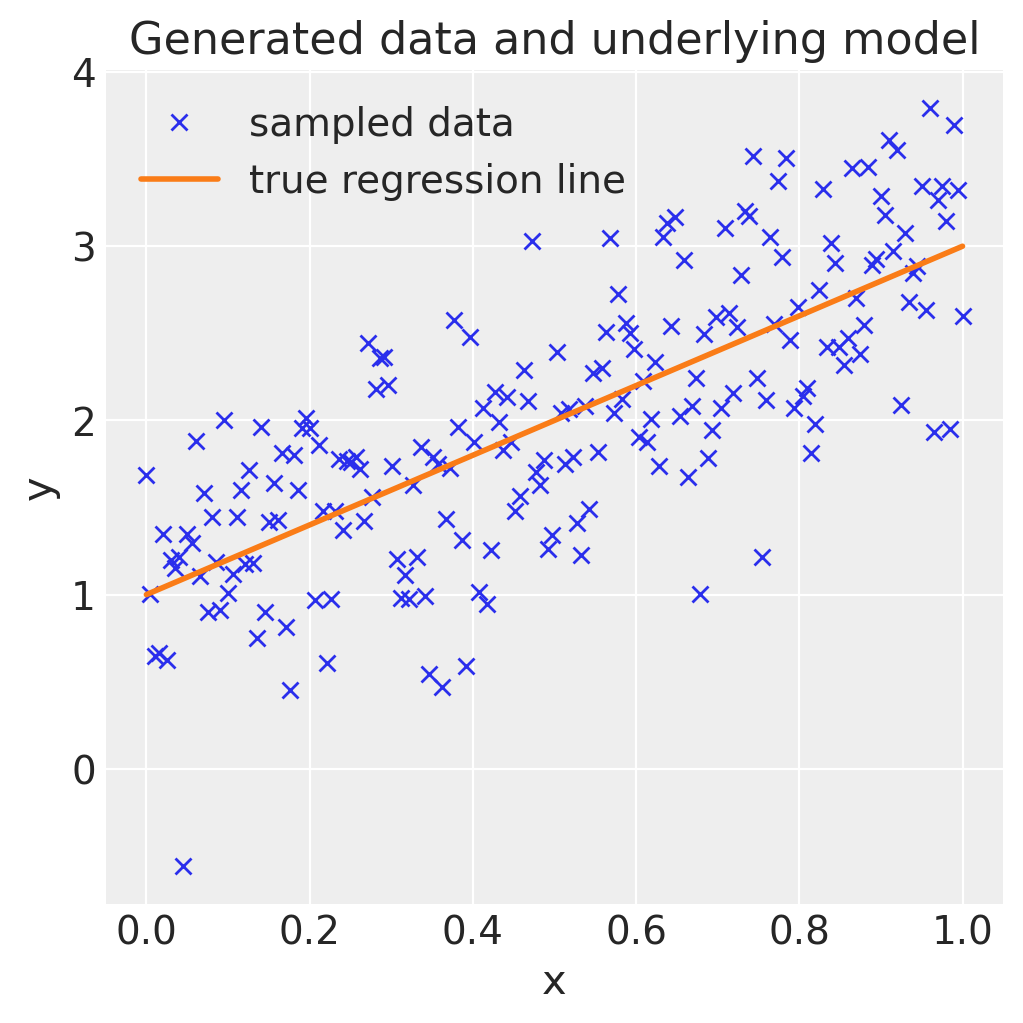

In [ ]:
# Graficamente
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [ ]:
# Estimando el modelo: regresion lineal bayesiana
with Model() as model:  # las especificaciones del modelo en PyMC3 se realizan en un With
    # Definienco priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = Normal("Intercept", 0, sigma=20)
    x_coeff = Normal("x", 0, sigma=20)

    # Definiendo la función de verosimilitud (likelihood)
    likelihood = Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inferencia
    # obtiene 3000 muestras posterior usando muestreo NUTS (Not U-Turn Sampling)
    trace = sample(3000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 33 seconds.


script alternativo
```
with Model() as model:
    # Especifica glm y envía la data (priors + likehood)
    # El modelo lineal, su verosimilitud y todos los parámetros son automáticamente agregados
    glm.GLM.from_formula("y ~ x", data)
    
    # obtiene 3000 muestras posterior usando muestreo NUTS (Not U-Turn Sampling)
    trace = sample(3000, cores=2)
```

C:\Users\Jose\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-6-c6474cd7ca7d>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


<Figure size 700x700 with 0 Axes>

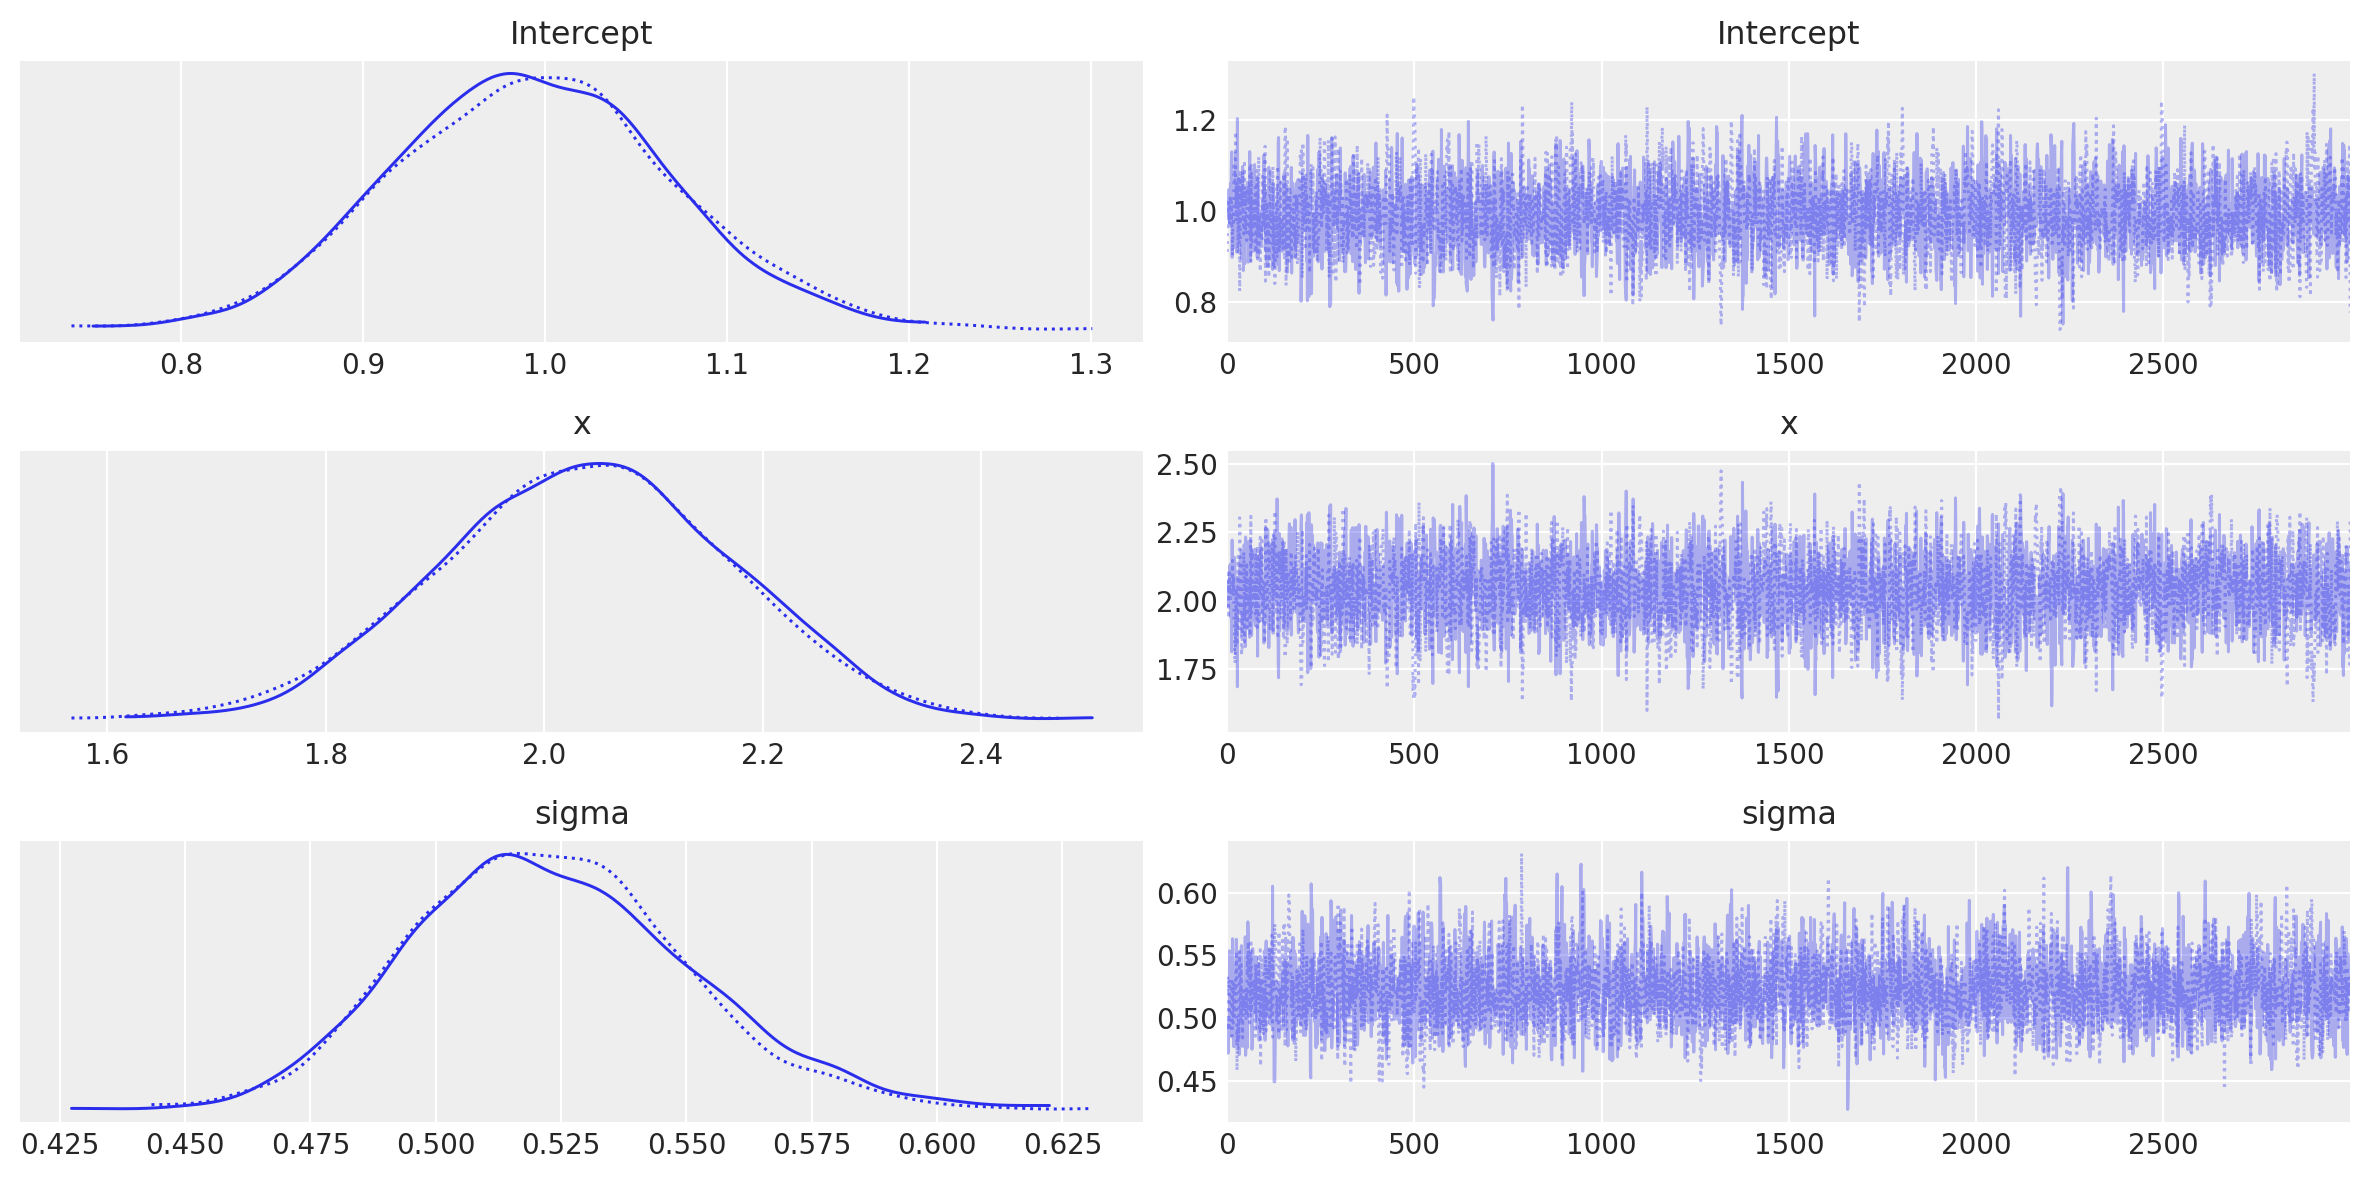

In [ ]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

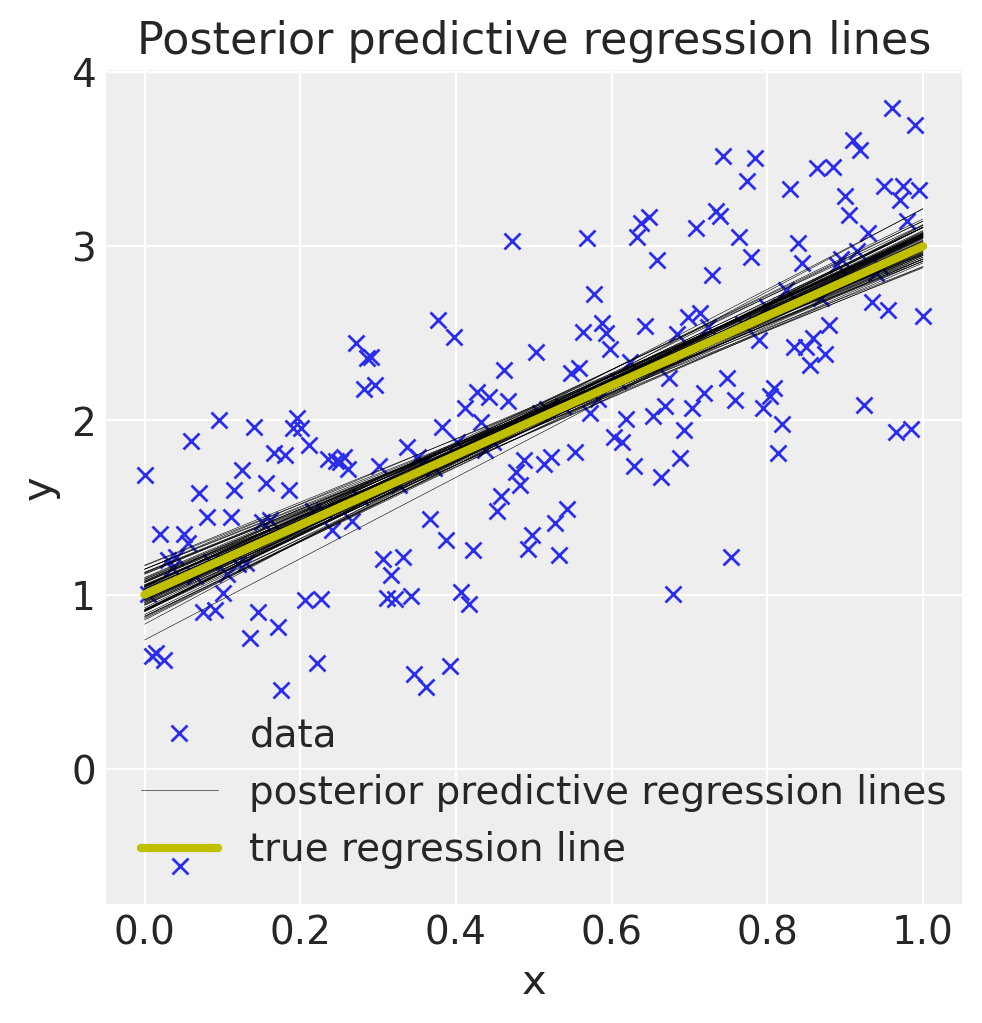

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, "x", label="data")
plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");